In [139]:
#Import desired tools needed for data collections and analysis
import numpy as np
import pandas as pd
import json
import requests
import gmaps
import matplotlib.pyplot as plt
from scipy.stats import linregress
from us import states
from config import api_key, gmaps_api_key
from census import Census
from config import census_key
c = Census(census_key, year=2018)

In [2]:
#Read josn file listing all cities in the OpenWeather API
city_list = pd.read_json("ProjectOne/city.list.json", orient="list")

#Select US cities from list
US_city_list = city_list.loc[city_list["country"] == "US", :]
US_city_list

,id,name,state,country,coord
141897,4046255,Bay Minette,AL,US,"{'lon': -87.773048, 'lat': 30.882959}"
141898,4046274,Edna,TX,US,"{'lon': -96.646088, 'lat': 28.97859}"
141899,4046319,Bayou La Batre,AL,US,"{'lon': -88.24852, 'lat': 30.403521}"
141900,4046332,Henderson,TX,US,"{'lon': -94.799377, 'lat': 32.153221}"
141901,4046430,Natalia,TX,US,"{'lon': -98.862534, 'lat': 29.18968}"
...,...,...,...,...,...
208905,8122840,Western Community Park,KS,US,"{'lon': -97.680717, 'lat': 38.367432}"
208906,8122866,Happy Homes Park,KS,US,"{'lon': -99.976273, 'lat': 37.7458}"
208907,8123060,Western Mobile Home Park South,KS,US,"{'lon': -100.939072, 'lat': 37.03735}"
209568,8260172,West Greenwich,RI,US,"{'lon': -71.660042, 'lat': 41.637001}"


In [3]:
#Separate coordinates into 2 data series for longitude and latitude
US_Cities = pd.concat([US_city_list.drop(['coord'], axis=1), US_city_list['coord'].apply(pd.Series)], axis=1)
US_Cities

,id,name,state,country,lon,lat
141897,4046255,Bay Minette,AL,US,-87.773048,30.882959
141898,4046274,Edna,TX,US,-96.646088,28.978590
141899,4046319,Bayou La Batre,AL,US,-88.248520,30.403521
141900,4046332,Henderson,TX,US,-94.799377,32.153221
141901,4046430,Natalia,TX,US,-98.862534,29.189680
...,...,...,...,...,...,...
208905,8122840,Western Community Park,KS,US,-97.680717,38.367432
208906,8122866,Happy Homes Park,KS,US,-99.976273,37.745800
208907,8123060,Western Mobile Home Park South,KS,US,-100.939072,37.037350
209568,8260172,West Greenwich,RI,US,-71.660042,41.637001


In [4]:
#Select only cities in Kansas
KS_city_list = US_Cities.loc[US_Cities["state"] == "KS", :].reset_index()
del KS_city_list["index"]
KS_city_list

,id,name,state,country,lon,lat
0,4048488,Stockton,KS,US,-99.265099,39.438068
1,4267354,Abilene,KS,US,-97.213913,38.917221
2,4267387,Adamsville,KS,US,-97.176430,37.173359
3,4267427,Akron,KS,US,-97.015038,37.351688
4,4267513,Alma,KS,US,-96.289162,39.016670
...,...,...,...,...,...,...
297,8122749,Gaslight Mobile Home Park,KS,US,-94.942368,39.756969
298,8122819,Southwestern Mobile Home Park,KS,US,-97.620148,38.802349
299,8122840,Western Community Park,KS,US,-97.680717,38.367432
300,8122866,Happy Homes Park,KS,US,-99.976273,37.745800


In [5]:
#Create data frame with columns for desired climate information
KS_city_data = pd.DataFrame({"City": KS_city_list["name"],
                             "Lat": KS_city_list["lat"],
                             "Lng": KS_city_list["lon"],
                             "Timezone_Offset": "",
                             "Current Date": "",
                             "Current Temp": "",
                             "Current Humidity": "",
                             "Day1 Date": "",
                             "Day1 Temp": "",
                             "Day1 Low": "",
                             "Day1 High": "",
                             "Day1 Humidity": "",
                             "Day1 Weather": "",
                             "Day2 Date": "",
                             "Day2 Temp": "",
                             "Day2 Low": "",
                             "Day2 High": "",
                             "Day2 Humidity": "",
                             "Day2 Weather": "",
                             "Day3 Date": "",
                             "Day3 Temp": "",
                             "Day3 Low": "",
                             "Day3 High": "",
                             "Day3 Humidity": "",
                             "Day3 Weather": "",
                             "Day4 Date": "",
                             "Day4 Temp": "",
                             "Day4 Low": "",
                             "Day4 High": "",
                             "Day4 Humidity": "",
                             "Day4 Weather": "",
                             "Day5 Date": "",
                             "Day5 Temp": "",
                             "Day5 Low": "",
                             "Day5 High": "",
                             "Day5 Humidity": "",
                             "Day5 Weather": "",
                             })
KS_city_data

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
0,Stockton,39.438068,-99.265099,,,,,,,,...,,,,,,,,,,
1,Abilene,38.917221,-97.213913,,,,,,,,...,,,,,,,,,,
2,Adamsville,37.173359,-97.176430,,,,,,,,...,,,,,,,,,,
3,Akron,37.351688,-97.015038,,,,,,,,...,,,,,,,,,,
4,Alma,39.016670,-96.289162,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Gaslight Mobile Home Park,39.756969,-94.942368,,,,,,,,...,,,,,,,,,,
298,Southwestern Mobile Home Park,38.802349,-97.620148,,,,,,,,...,,,,,,,,,,
299,Western Community Park,38.367432,-97.680717,,,,,,,,...,,,,,,,,,,
300,Happy Homes Park,37.745800,-99.976273,,,,,,,,...,,,,,,,,,,


In [6]:
#Query the OpenWeather API and place desired data into data frame

part = "minutely,hourly"

for index, row in KS_city_list.iterrows():
    lat = row["lat"]
    lon = row["lon"]

    URL = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&units=imperial&appid={api_key}"
    response = requests.get(URL).json()
    
    KS_city_data.loc[index,"Timezone_Offset"] = response["timezone_offset"]
    KS_city_data.loc[index,"Current Date"] = response["current"]["dt"]
    KS_city_data.loc[index,"Current Temp"] = response["current"]["temp"]
    KS_city_data.loc[index,"Current Humidity"] = response["current"]["humidity"]
    KS_city_data.loc[index,"Day1 Date"] = response["daily"][0]["dt"]
    KS_city_data.loc[index,"Day1 Temp"] = response["daily"][0]["temp"]["day"]
    KS_city_data.loc[index,"Day1 Low"] = response["daily"][0]["temp"]["min"]
    KS_city_data.loc[index,"Day1 High"] = response["daily"][0]["temp"]["max"]
    KS_city_data.loc[index,"Day1 Humidity"] = response["daily"][0]["humidity"]
    KS_city_data.loc[index,"Day1 Weather"] = response["daily"][0]["weather"][0]["main"]
    KS_city_data.loc[index,"Day2 Date"] = response["daily"][1]["dt"]
    KS_city_data.loc[index,"Day2 Temp"] = response["daily"][1]["temp"]["day"]
    KS_city_data.loc[index,"Day2 Low"] = response["daily"][1]["temp"]["min"]
    KS_city_data.loc[index,"Day2 High"] = response["daily"][1]["temp"]["max"]
    KS_city_data.loc[index,"Day2 Humidity"] = response["daily"][1]["humidity"]
    KS_city_data.loc[index,"Day2 Weather"] = response["daily"][1]["weather"][0]["main"]
    KS_city_data.loc[index,"Day3 Date"] = response["daily"][2]["dt"]
    KS_city_data.loc[index,"Day3 Temp"] = response["daily"][2]["temp"]["day"]
    KS_city_data.loc[index,"Day3 Low"] = response["daily"][2]["temp"]["min"]
    KS_city_data.loc[index,"Day3 High"] = response["daily"][2]["temp"]["max"]
    KS_city_data.loc[index,"Day3 Humidity"] = response["daily"][2]["humidity"]
    KS_city_data.loc[index,"Day3 Weather"] = response["daily"][2]["weather"][0]["main"]
    KS_city_data.loc[index,"Day4 Date"] = response["daily"][3]["dt"]
    KS_city_data.loc[index,"Day4 Temp"] = response["daily"][3]["temp"]["day"]
    KS_city_data.loc[index,"Day4 Low"] = response["daily"][3]["temp"]["min"]
    KS_city_data.loc[index,"Day4 High"] = response["daily"][3]["temp"]["max"]
    KS_city_data.loc[index,"Day4 Humidity"] = response["daily"][3]["humidity"]
    KS_city_data.loc[index,"Day4 Weather"] = response["daily"][3]["weather"][0]["main"]
    KS_city_data.loc[index,"Day5 Date"] = response["daily"][4]["dt"]
    KS_city_data.loc[index,"Day5 Temp"] = response["daily"][4]["temp"]["day"]
    KS_city_data.loc[index,"Day5 Low"] = response["daily"][4]["temp"]["min"]
    KS_city_data.loc[index,"Day5 High"] = response["daily"][4]["temp"]["max"]
    KS_city_data.loc[index,"Day5 Humidity"] = response["daily"][4]["humidity"]
    KS_city_data.loc[index,"Day5 Weather"] = response["daily"][4]["weather"][0]["main"]
    
KS_city_data

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
0,Stockton,39.438068,-99.265099,-18000,1591713736,74.73,78,1591725600,73.4,54.68,...,63.37,89.24,38,Clear,1592071200,83.14,63.01,88.16,46,Clear
1,Abilene,38.917221,-97.213913,-18000,1591713737,79.65,74,1591725600,83.8,59.29,...,64.78,85.82,44,Clear,1592071200,84.4,68.11,85.71,49,Clear
2,Adamsville,37.173359,-97.176430,-18000,1591713737,81.18,69,1591725600,83.28,61.79,...,63.23,90.12,39,Clear,1592071200,84.38,66.2,86.52,47,Clear
3,Akron,37.351688,-97.015038,-18000,1591713737,81.21,69,1591725600,84.11,61.86,...,63.12,87.82,46,Clear,1592071200,83.44,66.11,85.33,51,Clear
4,Alma,39.016670,-96.289162,-18000,1591713738,80.04,75,1591725600,82.96,57.18,...,64.87,81.7,61,Rain,1592071200,81.57,65.79,82.54,62,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Gaslight Mobile Home Park,39.756969,-94.942368,-18000,1591713870,76.75,73,1591725600,82.17,61.41,...,64.18,84.92,54,Rain,1592071200,81.01,64.71,81.55,60,Clear
298,Southwestern Mobile Home Park,38.802349,-97.620148,-18000,1591713870,79.77,65,1591725600,85.78,57.87,...,64.99,86.56,44,Clear,1592071200,84.94,67.39,86.13,45,Clear
299,Western Community Park,38.367432,-97.680717,-18000,1591713870,81.88,65,1591725600,86.31,57.04,...,64.58,87.91,41,Clear,1592071200,83.57,67.14,86.13,45,Clear
300,Happy Homes Park,37.745800,-99.976273,-18000,1591713871,66.76,63,1591725600,69.21,52.05,...,65.52,93.11,18,Clear,1592071200,94.66,65.16,99.25,18,Clear


In [7]:
# Configure gmaps
gmaps.configure(api_key=gmaps_api_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [8]:
#define coordinates from cities_df
coordinates = []
temperatures = []

for index, row in KS_city_data.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]
    coordinates.append((lat, lon))
    
    temp = row["Day1 High"]
    temperatures.append(str(temp))

coordinates

[(39.438068, -99.265099),
 (38.917221, -97.213913),
 (37.173359, -97.17643),
 (37.351688, -97.015038),
 (39.01667, -96.289162),
 (37.190338, -95.297188),
 (38.3489, -98.8162),
 (38.20002, -95.283592),
 (37.713902, -97.136429),
 (37.153358, -98.031174),
 (37.06197, -97.038368),
 (37.543941, -94.700241),
 (37.188641, -99.765678),
 (39.563049, -95.121643),
 (38.906109, -95.816101),
 (37.68668, -96.9767),
 (37.095909, -95.601639),
 (38.775009, -95.186363),
 (37.23336, -98.683701),
 (38.466679, -98.767029),
 (39.14167, -94.938583),
 (37.023682, -94.735497),
 (37.762508, -97.266991),
 (37.393909, -97.281158),
 (39.824451, -97.632538),
 (39.45612, -98.106163),
 (37.167568, -95.757202),
 (39.681938, -96.659737),
 (39.059731, -94.883583),
 (37.85004, -94.850243),
 (38.134449, -97.77005),
 (38.194469, -95.74276),
 (37.783352, -96.833641),
 (37.032249, -97.606987),
 (37.011459, -95.93525700000001),
 (38.818619, -95.689148),
 (37.679211, -95.457199),
 (38.972221, -97.022507),
 (37.630009, -97.7825

In [9]:
# Map temperature in all cities in list
fig = gmaps.figure(center=(38.5,-98.35), zoom_level=7)

heat_layer = gmaps.heatmap_layer(coordinates, weights=KS_city_data["Current Temp"], 
                                 dissipating=False, max_intensity=KS_city_data["Current Temp"].max(),
                                 point_radius = 0.1)

# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#Narrow list to cities withing +/- 0.5 deg latitude and -0.4 degress longitude
KC_area = KS_city_data.loc[((KS_city_data["Lat"] > 38.59)&(KS_city_data["Lat"] < 39.59)&(KS_city_data["Lng"] > -94.98))]
KC_area

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
20,Basehor,39.141670,-94.938583,-18000,1591713744,78.96,82,1591725600,83.57,58.01,...,63.28,84.49,54,Rain,1592071200,81.37,64.02,82,56,Clear
28,Bonner Springs,39.059731,-94.883583,-18000,1591713747,78.82,75,1591725600,84.69,59.05,...,64,85.15,52,Rain,1592071200,81.95,64.62,82.69,55,Clear
41,Clare,38.826950,-94.871353,-18000,1591713753,78.75,74,1591725600,83.91,57.4,...,62.82,83.62,56,Clouds,1592071200,80.51,63.19,81.27,59,Clear
58,De Soto,38.979172,-94.968582,-18000,1591713760,79.23,74,1591725600,84.87,58.57,...,63.55,84.63,53,Rain,1592071200,81.64,63.93,82.26,56,Clear
65,Edwardsville,39.061119,-94.819679,-18000,1591713764,78.82,75,1591725600,84.94,59.47,...,64.33,85.48,52,Rain,1592071200,82.18,65.01,82.98,54,Clear
79,Fairway,39.022228,-94.631897,-18000,1591713769,79.05,73,1591725600,84.11,59.23,...,64.35,84.97,51,Rain,1592071200,81.23,64.47,82.17,56,Clear
85,Gardner,38.810841,-94.927193,-18000,1591713774,78.24,74,1591725600,83.62,57.06,...,62.55,83.32,57,Clouds,1592071200,80.4,62.98,81.09,59,Clear
119,Johnson County,38.866669,-94.866913,-18000,1591713794,78.73,74,1591725600,84.25,57.88,...,63.18,84.04,55,Rain,1592071200,80.91,63.57,81.66,58,Clear
121,Kansas City,39.114170,-94.627457,-18000,1591713795,77.9,73,1591725600,83.8,59.63,...,64.74,85.37,51,Rain,1592071200,81.66,64.94,82.6,55,Clear
130,Lansing,39.248611,-94.900238,-18000,1591713799,77.76,83,1591725600,83.01,58.51,...,63.86,85.23,54,Rain,1592071200,82.09,64.98,82.74,54,Clear


In [11]:
US_Cities

,id,name,state,country,lon,lat
141897,4046255,Bay Minette,AL,US,-87.773048,30.882959
141898,4046274,Edna,TX,US,-96.646088,28.978590
141899,4046319,Bayou La Batre,AL,US,-88.248520,30.403521
141900,4046332,Henderson,TX,US,-94.799377,32.153221
141901,4046430,Natalia,TX,US,-98.862534,29.189680
...,...,...,...,...,...,...
208905,8122840,Western Community Park,KS,US,-97.680717,38.367432
208906,8122866,Happy Homes Park,KS,US,-99.976273,37.745800
208907,8123060,Western Mobile Home Park South,KS,US,-100.939072,37.037350
209568,8260172,West Greenwich,RI,US,-71.660042,41.637001


In [12]:
MO_Cities = US_Cities.loc[US_Cities["state"] == "MO", :].reset_index()
del MO_Cities["index"]
MO_Cities

,id,name,state,country,lon,lat
0,4049176,Chandler,MO,US,-94.382729,39.300282
1,4374497,Adrian,MO,US,-94.351624,38.397518
2,4374502,Advance,MO,US,-89.910652,37.104500
3,4374513,Affton,MO,US,-90.333168,38.550610
4,4374538,Airport Drive,MO,US,-94.510780,37.142559
...,...,...,...,...,...,...
461,5057511,Terre Haute,MO,US,-93.234100,40.439461
462,5057562,Trenton,MO,US,-93.616608,40.078899
463,5057655,Unionville,MO,US,-93.003258,40.476959
464,7259265,Fort Leonard Wood,MO,US,-92.157173,37.705730


In [13]:
KC_MO_area = MO_Cities.loc[((MO_Cities["lat"] > 38.59)&(MO_Cities["lat"] < 39.59)
                            &(MO_Cities["lon"] < -94.18))].reset_index()
del KC_MO_area["index"]
KC_MO_area

,id,name,state,country,lon,lat
0,4049176,Chandler,MO,US,-94.382729,39.300282
1,4376482,Belton,MO,US,-94.531898,38.811951
2,4377664,Blue Springs,MO,US,-94.281609,39.016949
3,4378990,Buckner,MO,US,-94.198563,39.132511
4,4379641,Camden Point,MO,US,-94.741631,39.452782
5,4380266,Cass County,MO,US,-94.366890,38.650009
6,4381444,Clay County,MO,US,-94.400230,39.316669
7,4381469,Claycomo,MO,US,-94.492447,39.202499
8,4385018,East Independence,MO,US,-94.355232,39.095558
9,4385966,Excelsior Springs,MO,US,-94.226059,39.339169


In [14]:
KC_MO_data = pd.DataFrame({"City": KC_MO_area["name"],
                             "Lat": KC_MO_area["lat"],
                             "Lng": KC_MO_area["lon"],
                             "Timezone_Offset": "",
                             "Current Date": "",
                             "Current Temp": "",
                             "Current Humidity": "",
                             "Day1 Date": "",
                             "Day1 Temp": "",
                             "Day1 Low": "",
                             "Day1 High": "",
                             "Day1 Humidity": "",
                             "Day1 Weather": "",
                             "Day2 Date": "",
                             "Day2 Temp": "",
                             "Day2 Low": "",
                             "Day2 High": "",
                             "Day2 Humidity": "",
                             "Day2 Weather": "",
                             "Day3 Date": "",
                             "Day3 Temp": "",
                             "Day3 Low": "",
                             "Day3 High": "",
                             "Day3 Humidity": "",
                             "Day3 Weather": "",
                             "Day4 Date": "",
                             "Day4 Temp": "",
                             "Day4 Low": "",
                             "Day4 High": "",
                             "Day4 Humidity": "",
                             "Day4 Weather": "",
                             "Day5 Date": "",
                             "Day5 Temp": "",
                             "Day5 Low": "",
                             "Day5 High": "",
                             "Day5 Humidity": "",
                             "Day5 Weather": "",
                             })
KC_MO_data

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
0,Chandler,39.300282,-94.382729,,,,,,,,...,,,,,,,,,,
1,Belton,38.811951,-94.531898,,,,,,,,...,,,,,,,,,,
2,Blue Springs,39.016949,-94.281609,,,,,,,,...,,,,,,,,,,
3,Buckner,39.132511,-94.198563,,,,,,,,...,,,,,,,,,,
4,Camden Point,39.452782,-94.741631,,,,,,,,...,,,,,,,,,,
5,Cass County,38.650009,-94.366890,,,,,,,,...,,,,,,,,,,
6,Clay County,39.316669,-94.400230,,,,,,,,...,,,,,,,,,,
7,Claycomo,39.202499,-94.492447,,,,,,,,...,,,,,,,,,,
8,East Independence,39.095558,-94.355232,,,,,,,,...,,,,,,,,,,
9,Excelsior Springs,39.339169,-94.226059,,,,,,,,...,,,,,,,,,,


In [15]:
#Query the OpenWeather API and place desired data into data frame

part = "minutely,hourly"

for index, row in KC_MO_data.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]

    URL = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&units=imperial&appid={api_key}"
    response = requests.get(URL).json()
    
    KC_MO_data.loc[index,"Timezone_Offset"] = response["timezone_offset"]
    KC_MO_data.loc[index,"Current Date"] = response["current"]["dt"]
    KC_MO_data.loc[index,"Current Temp"] = response["current"]["temp"]
    KC_MO_data.loc[index,"Current Humidity"] = response["current"]["humidity"]
    KC_MO_data.loc[index,"Day1 Date"] = response["daily"][0]["dt"]
    KC_MO_data.loc[index,"Day1 Temp"] = response["daily"][0]["temp"]["day"]
    KC_MO_data.loc[index,"Day1 Low"] = response["daily"][0]["temp"]["min"]
    KC_MO_data.loc[index,"Day1 High"] = response["daily"][0]["temp"]["max"]
    KC_MO_data.loc[index,"Day1 Humidity"] = response["daily"][0]["humidity"]
    KC_MO_data.loc[index,"Day1 Weather"] = response["daily"][0]["weather"][0]["main"]
    KC_MO_data.loc[index,"Day2 Date"] = response["daily"][1]["dt"]
    KC_MO_data.loc[index,"Day2 Temp"] = response["daily"][1]["temp"]["day"]
    KC_MO_data.loc[index,"Day2 Low"] = response["daily"][1]["temp"]["min"]
    KC_MO_data.loc[index,"Day2 High"] = response["daily"][1]["temp"]["max"]
    KC_MO_data.loc[index,"Day2 Humidity"] = response["daily"][1]["humidity"]
    KC_MO_data.loc[index,"Day2 Weather"] = response["daily"][1]["weather"][0]["main"]
    KC_MO_data.loc[index,"Day3 Date"] = response["daily"][2]["dt"]
    KC_MO_data.loc[index,"Day3 Temp"] = response["daily"][2]["temp"]["day"]
    KC_MO_data.loc[index,"Day3 Low"] = response["daily"][2]["temp"]["min"]
    KC_MO_data.loc[index,"Day3 High"] = response["daily"][2]["temp"]["max"]
    KC_MO_data.loc[index,"Day3 Humidity"] = response["daily"][2]["humidity"]
    KC_MO_data.loc[index,"Day3 Weather"] = response["daily"][2]["weather"][0]["main"]
    KC_MO_data.loc[index,"Day4 Date"] = response["daily"][3]["dt"]
    KC_MO_data.loc[index,"Day4 Temp"] = response["daily"][3]["temp"]["day"]
    KC_MO_data.loc[index,"Day4 Low"] = response["daily"][3]["temp"]["min"]
    KC_MO_data.loc[index,"Day4 High"] = response["daily"][3]["temp"]["max"]
    KC_MO_data.loc[index,"Day4 Humidity"] = response["daily"][3]["humidity"]
    KC_MO_data.loc[index,"Day4 Weather"] = response["daily"][3]["weather"][0]["main"]
    KC_MO_data.loc[index,"Day5 Date"] = response["daily"][4]["dt"]
    KC_MO_data.loc[index,"Day5 Temp"] = response["daily"][4]["temp"]["day"]
    KC_MO_data.loc[index,"Day5 Low"] = response["daily"][4]["temp"]["min"]
    KC_MO_data.loc[index,"Day5 High"] = response["daily"][4]["temp"]["max"]
    KC_MO_data.loc[index,"Day5 Humidity"] = response["daily"][4]["humidity"]
    KC_MO_data.loc[index,"Day5 Weather"] = response["daily"][4]["weather"][0]["main"]
    
KC_MO_data

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
0,Chandler,39.300282,-94.382729,-18000,1591713872,75.72,78,1591725600,80.98,59.14,...,64.11,83.95,54,Clear,1592071200,79.86,64,80.89,62,Clear
1,Belton,38.811951,-94.531898,-18000,1591713873,78.89,83,1591725600,82.26,57.34,...,62.83,83.26,57,Clouds,1592071200,79.41,62.78,80.83,63,Clear
2,Blue Springs,39.016949,-94.281609,-18000,1591713873,75.36,83,1591725600,81.27,57.56,...,63.32,83.97,59,Clouds,1592071200,79.81,63.57,81.05,62,Clear
3,Buckner,39.132511,-94.198563,-18000,1591713874,75.47,89,1591725600,80.8,58.35,...,63.72,84.04,59,Clear,1592071200,79.93,64.02,81.16,63,Clear
4,Camden Point,39.452782,-94.741631,-18000,1591713874,76.39,83,1591725600,81.97,59.34,...,63.23,84.72,58,Clear,1592071200,80.73,64.22,81.19,59,Clear
5,Cass County,38.650009,-94.366890,-18000,1591713875,77.76,78,1591725600,82.58,57.79,...,63,83.41,59,Clouds,1592071200,79.68,63.1,81.41,64,Clear
6,Clay County,39.316669,-94.400230,-18000,1591713875,75.83,78,1591725600,80.83,59.07,...,63.9,83.79,54,Clear,1592071200,79.66,63.86,80.65,62,Clear
7,Claycomo,39.202499,-94.492447,-18000,1591713875,76.12,73,1591725600,82.54,59.61,...,65.23,84.92,50,Clouds,1592071200,80.74,64.47,81.82,58,Clear
8,East Independence,39.095558,-94.355232,-18000,1591713876,75.43,83,1591725600,81.66,58.59,...,64.15,84.36,55,Clouds,1592071200,80.28,64.04,81.41,60,Clear
9,Excelsior Springs,39.339169,-94.226059,-18000,1591713876,76.01,78,1591725600,79.75,59.34,...,63.54,83.68,57,Clear,1592071200,79.5,64.04,80.49,63,Clear


In [16]:
#Add KC MO data to KC area data - this data frame represents the KC Metro area
KC_Metro = KC_area.append(KC_MO_data, ignore_index=True)

In [179]:
KC_Metro[["Day1 High", "Day2 High", "Day3 High"]

,Day1 High,Day2 High,Day3 High
0,83.57,71.87,80.76
1,84.69,72.54,81.45
2,83.91,71.71,80.17
3,84.87,72.59,81.37
4,84.94,72.64,81.57
...,...,...,...
63,84.15,71.85,80.98
64,83.84,71.44,80.65
65,83.35,71.8,80.96
66,83.68,71.69,80.67


In [18]:
KC_coord = []
KC_markers = []

for index, row in KC_Metro.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]
    KC_coord.append((lat, lon))


#for index, row in KC_Metro.iterrows():
    temp = row["Day1 High"]
    KC_markers.append(str(temp))
KC_markers

['83.57',
 '84.69',
 '83.91',
 '84.87',
 '84.94',
 '84.11',
 '83.62',
 '84.25',
 '83.8',
 '83.43',
 '83.52',
 '84.07',
 '84.43',
 '83.03',
 '84.56',
 '84.07',
 '84.18',
 '83.79',
 '84.11',
 '84.09',
 '83.89',
 '83.98',
 '84.33',
 '83.35',
 '83.91',
 '84.22',
 '83.79',
 '82.26',
 '83.03',
 '83.93',
 '83.73',
 '82.58',
 '83.55',
 '84.06',
 '83.46',
 '83.71',
 '83.53',
 '83.64',
 '82.44',
 '81.59',
 '82.24',
 '82.9',
 '83.34',
 '83.14',
 '83.75',
 '82.02',
 '81.7',
 '82.69',
 '82.81',
 '81.57',
 '83.84',
 '83.86',
 '83.66',
 '82.04',
 '83.95',
 '83.64',
 '83.05',
 '81.72',
 '84.04',
 '81.37',
 '82.69',
 '84.22',
 '83.95',
 '84.15',
 '83.84',
 '83.35',
 '83.68',
 '83.91']

In [19]:
fig1 = gmaps.figure(layout=figure_layout)
fig1 = gmaps.figure(center=(39.1,-94.58), zoom_level=9.1)

heat_layer = gmaps.heatmap_layer(KC_coord, weights=KC_Metro["Day1 High"], 
                                 dissipating=False, max_intensity=KC_Metro["Day1 High"].max(),
                                 point_radius = .1)

marker = gmaps.marker_layer(KC_coord, label=KC_markers)

# Add the layer to the map
fig1.add_layer(heat_layer)

fig1.add_layer(marker)


fig1

Figure(layout=FigureLayout(height='420px'))

In [20]:
#Find the lat/lon coordinates for KC MO
KC_MO_lat = KC_MO_data["Lat"].loc[KC_MO_data["City"] == "Kansas City"]
KC_MO_lon = KC_MO_data["Lng"].loc[KC_MO_data["City"] == "Kansas City"]
print(KC_MO_lat)
#locate KC_MO row in the KC_Metro dataframe

KC_Metro.loc[KC_Metro["City"] == "Kansas City"]
#KC MO is row 43 in KC_Metro dataframe

17    39.099731
Name: Lat, dtype: float64


,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
8,Kansas City,39.114170,-94.627457,-18000,1591713795,77.9,73,1591725600,83.8,59.63,...,64.74,85.37,51,Rain,1592071200,81.66,64.94,82.6,55,Clear
43,Kansas City,39.099731,-94.578568,-18000,1591713880,76.89,73,1591725600,83.14,59.34,...,64.63,85.01,51,Clouds,1592071200,81.14,64.53,82.09,56,Clear


In [21]:



#Find KC MO temps on Days 1 - 5
KC_MO_D1_T = KC_MO_data["Day1 High"].loc[KC_MO_data["City"] == "Kansas City"]
KC_MO_D2_T = KC_MO_data["Day2 High"].loc[KC_MO_data["City"] == "Kansas City"]
KC_MO_D3_T = KC_MO_data["Day3 High"].loc[KC_MO_data["City"] == "Kansas City"]
KC_MO_D4_T = KC_MO_data["Day4 High"].loc[KC_MO_data["City"] == "Kansas City"]
KC_MO_D5_T = KC_MO_data["Day5 High"].loc[KC_MO_data["City"] == "Kansas City"]

In [23]:
KC_Metro.columns

Index(['City', 'Lat', 'Lng', 'Timezone_Offset', 'Current Date', 'Current Temp',
       'Current Humidity', 'Day1 Date', 'Day1 Temp', 'Day1 Low', 'Day1 High',
       'Day1 Humidity', 'Day1 Weather', 'Day2 Date', 'Day2 Temp', 'Day2 Low',
       'Day2 High', 'Day2 Humidity', 'Day2 Weather', 'Day3 Date', 'Day3 Temp',
       'Day3 Low', 'Day3 High', 'Day3 Humidity', 'Day3 Weather', 'Day4 Date',
       'Day4 Temp', 'Day4 Low', 'Day4 High', 'Day4 Humidity', 'Day4 Weather',
       'Day5 Date', 'Day5 Temp', 'Day5 Low', 'Day5 High', 'Day5 Humidity',
       'Day5 Weather'],
      dtype='object')

In [24]:
#Create new data frame to compare distance from KC MO to temperature
KC_Metro_comparison = KC_Metro[["City", "Lat", "Lng", "Day1 High", 
                               "Day2 High", "Day3 High", "Day4 High",
                               "Day5 High"]]
#KC_Metro_comparison = KC_Metro_comparison(columns=["Chng Lat", "Chng Lng", 
#                                                            "Day1 Chng", "Day2 Chng", 
#                                                            "Day3 Chng", "Day4 Chng", 
#                                                            "Day5 Chng"])

for index, row in KC_Metro_comparison.iterrows():

    KC_Metro_comparison.loc[index, "Chng Lat"] = abs(KC_Metro.iloc[43, 1] - row["Lat"])
    KC_Metro_comparison.loc[index, "Chng Lng"] = abs(KC_Metro.iloc[43, 2] - row["Lng"])
    KC_Metro_comparison.loc[index, "Day1 Chng"] = row["Day1 High"] - KC_Metro.iloc[43, 10]
    KC_Metro_comparison.loc[index, "Day2 Chng"] = row["Day2 High"] - KC_Metro.iloc[43, 16]
    KC_Metro_comparison.loc[index, "Day3 Chng"] = row["Day3 High"] - KC_Metro.iloc[43, 22]
    KC_Metro_comparison.loc[index, "Day4 Chng"] = row["Day4 High"] - KC_Metro.iloc[43, 28]
    KC_Metro_comparison.loc[index, "Day5 Chng"] = row["Day5 High"] - KC_Metro.iloc[43, 34]


KC_Metro_comparison

C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,City,Lat,Lng,Day1 High,Day2 High,Day3 High,Day4 High,Day5 High,Chng Lat,Chng Lng,Day1 Chng,Day2 Chng,Day3 Chng,Day4 Chng,Day5 Chng
0,Basehor,39.141670,-94.938583,83.57,71.87,80.76,84.49,82,0.041939,0.360015,0.43,-0.29,-0.42,-0.52,-0.09
1,Bonner Springs,39.059731,-94.883583,84.69,72.54,81.45,85.15,82.69,0.040000,0.305015,1.55,0.38,0.27,0.14,0.60
2,Clare,38.826950,-94.871353,83.91,71.71,80.17,83.62,81.27,0.272781,0.292785,0.77,-0.45,-1.01,-1.39,-0.82
3,De Soto,38.979172,-94.968582,84.87,72.59,81.37,84.63,82.26,0.120559,0.390014,1.73,0.43,0.19,-0.38,0.17
4,Edwardsville,39.061119,-94.819679,84.94,72.64,81.57,85.48,82.98,0.038612,0.241111,1.80,0.48,0.39,0.47,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Sadler,39.438610,-94.941910,84.15,71.85,80.98,85.06,82.4,0.338879,0.363342,1.01,-0.31,-0.20,0.05,0.31
64,Smithville,39.386940,-94.581070,83.84,71.44,80.65,84.61,81.36,0.287209,0.002502,0.70,-0.72,-0.53,-0.40,-0.73
65,Sugar Creek,39.109730,-94.444672,83.35,71.8,80.96,84.56,81.52,0.009999,0.133896,0.21,-0.36,-0.22,-0.45,-0.57
66,Weatherby Lake,39.237782,-94.696068,83.68,71.69,80.67,85.14,82.6,0.138051,0.117500,0.54,-0.47,-0.51,0.13,0.51


In [87]:
#Calculating distance from changes in latitude and longitude 
#formulas from https://www.sisense.com/blog/latitude-longitude-distance-calculation-explained/

#a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)

#c = 2 * atan2( √a, √(1−a) )

#d = R * c

#Where φ represent the latitudes, and λ represent the longitudes.
KClat = KC_Metro.iloc[43, 1]

for index, row in KC_Metro_comparison.iterrows():
    KC_Metro_comparison.loc[index, "a"] = np.sin(np.deg2rad(row["Chng Lat"])/2)**2 + ((np.cos(np.deg2rad(row["Lat"]))) * (np.cos(np.deg2rad(KClat))) * (np.sin(np.deg2rad(row["Chng Lng"])/2)**2))    
for index, row in KC_Metro_comparison.iterrows():    
    KC_Metro_comparison.loc[index, "Distance (miles)"] = round((2 * (np.arctan2((np.sqrt(row["a"])), (np.sqrt(1-row["a"]))))) *3958.8, 2)
    
#for index, row in KC_Metro_comparison.iterrows():  
#    KC_Metro_comparison.loc[index, "Distance"] = 3,958.8 * row["c"]
#distance = 3,958.8 * c

KC_Metro_comparison

,City,Lat,Lng,Day1 High,Day2 High,Day3 High,Day4 High,Day5 High,Chng Lat,Chng Lng,Day1 Chng,Day2 Chng,Day3 Chng,Day4 Chng,Day5 Chng,a,Distance (miles)
0,Basehor,39.141670,-94.938583,83.57,71.87,80.76,84.49,82,0.041939,0.360015,0.43,-0.29,-0.42,-0.52,-0.09,6.074880e-06,19.51
1,Bonner Springs,39.059731,-94.883583,84.69,72.54,81.45,85.15,82.69,0.040000,0.305015,1.55,0.38,0.27,0.14,0.60,4.391190e-06,16.59
2,Clare,38.826950,-94.871353,83.91,71.71,80.17,83.62,81.27,0.272781,0.292785,0.77,-0.45,-1.01,-1.39,-0.82,9.613369e-06,24.55
3,De Soto,38.979172,-94.968582,84.87,72.59,81.37,84.63,82.26,0.120559,0.390014,1.73,0.43,0.19,-0.38,0.17,8.095190e-06,22.53
4,Edwardsville,39.061119,-94.819679,84.94,72.64,81.57,85.48,82.98,0.038612,0.241111,1.80,0.48,0.39,0.47,0.89,2.781284e-06,13.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Sadler,39.438610,-94.941910,84.15,71.85,80.98,85.06,82.4,0.338879,0.363342,1.01,-0.31,-0.20,0.05,0.31,1.477110e-05,30.43
64,Smithville,39.386940,-94.581070,83.84,71.44,80.65,84.61,81.36,0.287209,0.002502,0.70,-0.72,-0.53,-0.40,-0.73,6.282170e-06,19.84
65,Sugar Creek,39.109730,-94.444672,83.35,71.8,80.96,84.56,81.52,0.009999,0.133896,0.21,-0.36,-0.22,-0.45,-0.57,8.297559e-07,7.21
66,Weatherby Lake,39.237782,-94.696068,83.68,71.69,80.67,85.14,82.6,0.138051,0.117500,0.54,-0.47,-0.51,0.13,0.51,2.083325e-06,11.43


In [72]:
#Troubleshooting calcs - discovered numpy calculates radians by default and lat/lon is measured in degrees
#convert all var from degrees to radians for the above calculations
lat = np.deg2rad(39.141670)
lon = np.deg2rad(-94.883583)
chlat = np.deg2rad(0.041939)
chlon = np.deg2rad(0.360015)
KClat = np.deg2rad(KC_Metro.iloc[43, 1])
np.sin(chlat/2)**2 + ((np.cos(lat)) * (np.cos(KClat)) * (np.sin(chlon/2)**2))
np.sin((chlat/2.))
np.cos(lat)

0.7755875247872936

In [111]:
KC_Metro_comparison_sorted = KC_Metro_comparison.sort_values("Distance (miles)")
KC_Metro_comparison_sorted

,City,Lat,Lng,Day1 High,Day2 High,Day3 High,Day4 High,Day5 High,Chng Lat,Chng Lng,Day1 Chng,Day2 Chng,Day3 Chng,Day4 Chng,Day5 Chng,a,Distance (miles)
43,Kansas City,39.099731,-94.578568,83.14,72.16,81.18,85.01,82.09,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00
51,North Kansas City,39.130001,-94.562180,83.86,72.63,81.75,85.5,82.54,0.030270,0.016388,0.72,0.47,0.57,0.49,0.45,8.209046e-08,2.27
8,Kansas City,39.114170,-94.627457,83.8,72.41,81.41,85.37,82.6,0.014439,0.048889,0.66,0.25,0.23,0.36,0.51,1.254761e-07,2.80
24,Westwood,39.040562,-94.616898,83.91,72.07,80.94,84.87,82.04,0.059169,0.038330,0.77,-0.09,-0.24,-0.14,-0.05,3.340538e-07,4.58
21,Roeland Park,39.037510,-94.632179,83.98,72.05,80.92,84.87,82.06,0.062221,0.053611,0.84,-0.11,-0.26,-0.14,-0.03,4.267642e-07,5.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Plattsburg,39.565552,-94.448013,83.05,70.38,79.43,83.57,80.1,0.465821,0.130555,-0.09,-1.78,-1.75,-1.44,-1.99,1.730113e-05,32.93
31,Cass County,38.650009,-94.366890,82.58,70.93,79.38,83.41,81.41,0.449722,0.211678,-0.56,-1.23,-1.80,-1.60,-0.68,1.747023e-05,33.09
40,Harrisonville,38.653339,-94.348839,82.24,70.66,79.16,83.17,81.25,0.446392,0.229729,-0.90,-1.50,-2.02,-1.84,-0.84,1.761063e-05,33.23
13,Louisburg,38.619461,-94.680794,83.03,71.19,79.18,83.1,80.49,0.480270,0.102226,-0.11,-0.97,-2.00,-1.91,-1.60,1.804814e-05,33.64


Text(0, 0.5, 'Change in Temperature')

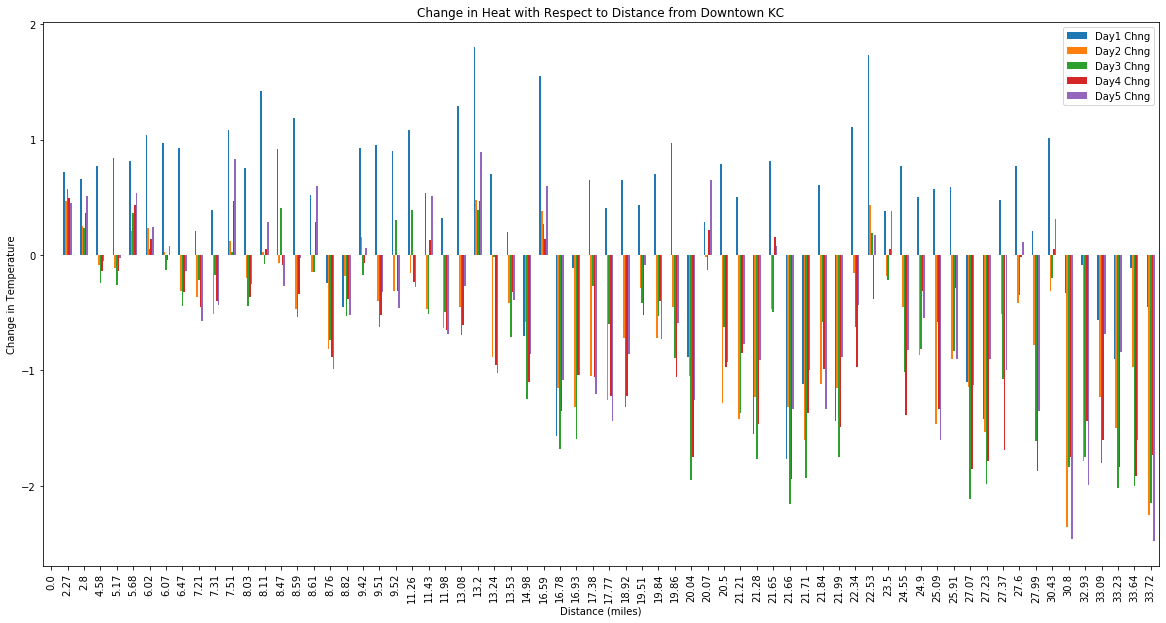

In [120]:
#Plot distance from downtown vs change in temperature
KC_Metro_comparison_sorted.plot.bar(x="Distance (miles)", y=["Day1 Chng","Day2 Chng", "Day3 Chng", "Day4 Chng", "Day5 Chng"], figsize=(20,10))
#KC_Metro_comparison_sorted.plot.bar(x="Distance (miles)", y="Day2 Chng", figsize=(20,3))
plt.title("Change in Heat with Respect to Distance from Downtown KC")
plt.xlabel("Distance (miles)")
plt.ylabel("Change in Temperature")

In [172]:
#Linear Regression Analysis
#make distance v change in temp data set
D1_Temp_V_Dist = KC_Metro_comparison[["Distance (miles)", "Day1 Chng"]]
D2_Temp_V_Dist = KC_Metro_comparison[["Distance (miles)", "Day2 Chng"]]
D3_Temp_V_Dist = KC_Metro_comparison[["Distance (miles)", "Day3 Chng"]]
D4_Temp_V_Dist = KC_Metro_comparison[["Distance (miles)", "Day4 Chng"]]
D5_Temp_V_Dist = KC_Metro_comparison[["Distance (miles)", "Day5 Chng"]]

#Rename new dataframe columns to prepare for combining dataframes
D1_Temp_V_Dist = D1_Temp_V_Dist.rename(columns={"Day1 Chng": "Temp Change"})
D2_Temp_V_Dist = D1_Temp_V_Dist.rename(columns={"Day2 Chng": "Temp Change"})
D3_Temp_V_Dist = D1_Temp_V_Dist.rename(columns={"Day3 Chng": "Temp Change"})
D4_Temp_V_Dist = D1_Temp_V_Dist.rename(columns={"Day4 Chng": "Temp Change"})
D5_Temp_V_Dist = D1_Temp_V_Dist.rename(columns={"Day5 Chng": "Temp Change"})

#Concatinate dataframes
#df.append(df2)
#pd.concat([t1, t2, t3, t4, t5])
Temp_V_Dist = D1_Temp_V_Dist.append(D2_Temp_V_Dist)
Temp_V_Dist = Temp_V_Dist.append(D3_Temp_V_Dist)
Temp_V_Dist = Temp_V_Dist.append(D4_Temp_V_Dist)
Temp_V_Dist = Temp_V_Dist.append(D5_Temp_V_Dist)
Temp_V_Dist

,Distance (miles),Temp Change
0,19.51,0.43
1,16.59,1.55
2,24.55,0.77
3,22.53,1.73
4,13.20,1.80
...,...,...
63,30.43,1.01
64,19.84,0.70
65,7.21,0.21
66,11.43,0.54


The r-squared is: 0.14


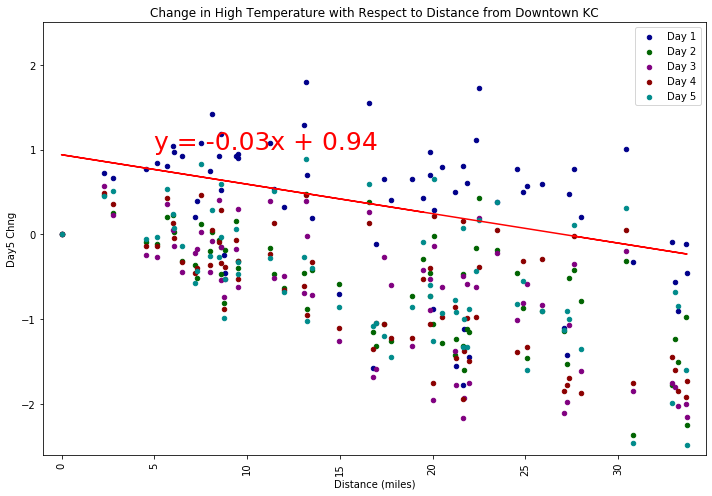

In [166]:
ax = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day1 Chng", color="DarkBlue", label="Day 1", figsize=(10,7))
ax1 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day2 Chng", color="DarkGreen", label="Day 2", ax=ax)
ax2 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day3 Chng", color="Purple", label="Day 3", ax=ax)
ax3 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day4 Chng", color="DarkRed", label="Day 4", ax=ax)
ax4 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day5 Chng", color="DarkCyan", label="Day 5", ax=ax)

x_values = Temp_V_Dist["Distance (miles)"]
y_values = Temp_V_Dist["Temp Change"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 1),fontsize=25,color="red")
print(f"The r-squared is: {round(rvalue**2, 2)}")
plt.title("Change in High Temperature with Respect to Distance from Downtown KC")
plt.xlabel("Distance (miles)")
plt.xticks(rotation="vertical")
plt.xlim(-1, max(KC_Metro_comparison["Distance (miles)"])+1)
plt.ylim(-2.6, 2.5)
plt.tight_layout()


The r-squared is: 0.14
The r-squared is: 0.45
The r-squared is: 0.47
The r-squared is: 0.46
The r-squared is: 0.35


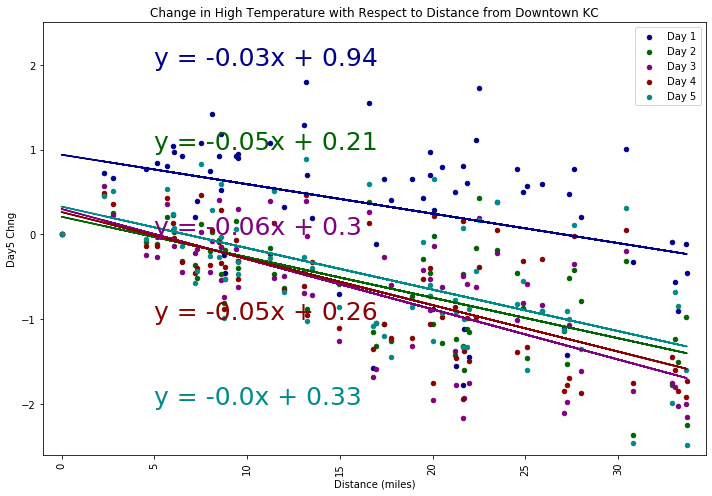

In [175]:
ax = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day1 Chng", color="DarkBlue", label="Day 1", figsize=(10,7))
ax1 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day2 Chng", color="DarkGreen", label="Day 2", ax=ax)
ax2 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day3 Chng", color="Purple", label="Day 3", ax=ax)
ax3 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day4 Chng", color="DarkRed", label="Day 4", ax=ax)
ax4 = KC_Metro_comparison.plot.scatter(x="Distance (miles)", y="Day5 Chng", color="DarkCyan", label="Day 5", ax=ax)

x_values = KC_Metro_comparison["Distance (miles)"]
y_values = KC_Metro_comparison["Day1 Chng"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="DarkBlue")
plt.annotate(line_eq,(5, 2),fontsize=25,color="DarkBlue")
print(f"The r-squared is: {round(rvalue**2, 2)}")

x_values = KC_Metro_comparison["Distance (miles)"]
y2_values = KC_Metro_comparison["Day2 Chng"]
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values, y2_values)
regress_values2 = x_values * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.plot(x_values,regress_values2,"r-",color="DarkGreen")
plt.annotate(line_eq2,(5, 1),fontsize=25,color="DarkGreen")
print(f"The r-squared is: {round(rvalue2**2, 2)}")

x_values = KC_Metro_comparison["Distance (miles)"]
y3_values = KC_Metro_comparison["Day3 Chng"]
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values, y3_values)
regress_values3 = x_values * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.plot(x_values,regress_values3,"r-",color="Purple")
plt.annotate(line_eq3,(5, 0),fontsize=25,color="Purple")
print(f"The r-squared is: {round(rvalue3**2, 2)}")

x_values = KC_Metro_comparison["Distance (miles)"]
y4_values = KC_Metro_comparison["Day4 Chng"]
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x_values, y4_values)
regress_values4 = x_values * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))
plt.plot(x_values,regress_values4,"r-",color="DarkRed")
plt.annotate(line_eq4,(5, -1),fontsize=25,color="DarkRed")
print(f"The r-squared is: {round(rvalue4**2, 2)}")

x_values = KC_Metro_comparison["Distance (miles)"]
y5_values = KC_Metro_comparison["Day5 Chng"]
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_values, y5_values)
regress_values5 = x_values * slope5 + intercept5
line_eq5 = "y = " + str(round(slope5,-2)) + "x + " + str(round(intercept5,2))
plt.plot(x_values,regress_values5,"r-",color="DarkCyan")
plt.annotate(line_eq5,(5, -2),fontsize=25,color="DarkCyan")
print(f"The r-squared is: {round(rvalue5**2, 2)}")

plt.title("Change in High Temperature with Respect to Distance from Downtown KC")
plt.xlabel("Distance (miles)")
plt.xticks(rotation="vertical")
plt.xlim(-1, max(KC_Metro_comparison["Distance (miles)"])+1)
plt.ylim(-2.6, 2.5)
plt.tight_layout()
plt.savefig("temp_vs_dist.png")

In [136]:
KC_Metro_comparison.describe()

,Lat,Lng,Chng Lat,Chng Lng,Day1 Chng,Day2 Chng,Day3 Chng,Day4 Chng,Day5 Chng,a,Distance (miles)
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,39.077787,-94.577823,0.181440,0.183240,0.347353,-0.605735,-0.708971,-0.671912,-0.506324,0.000006,17.074706
std,0.224094,0.216357,0.131511,0.112839,0.828368,0.641799,0.772961,0.728116,0.746428,0.000005,8.986609
min,38.619461,-94.968582,0.000000,0.000000,-1.770000,-2.360000,-2.160000,-1.940000,-2.480000,0.000000,0.000000
25%,38.920006,-94.726276,0.077704,0.093890,-0.095000,-1.125000,-1.332500,-1.335000,-0.992500,0.000001,8.722500
50%,39.050702,-94.597038,0.146244,0.170701,0.580000,-0.470000,-0.535000,-0.485000,-0.535000,0.000005,17.575000
75%,39.221737,-94.391896,0.276388,0.258551,0.905000,-0.157500,-0.165000,-0.062500,0.065000,0.000008,22.772500
max,39.565552,-94.198563,0.480270,0.390014,1.800000,0.480000,0.570000,0.490000,0.890000,0.000018,33.720000


# Collect Population Data from Census API

In [26]:
census_data = c.acs5.get(("NAME", "B01003_001E"), 
                         {'for': 'zip code tabulation area:*'})
#, 'in': 'state:{}'.format(states.KS.fips)
                     #       {'for': 'zip code tabulation area:*'}

#for=zip+code+tabulation+area:*&in=state:02
#c.acs5.get(('NAME', 'B25034_010E'),
#          {'for': 'state:{}'.format(states.MD.fips)})
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

census_pd = census_pd[["Zipcode", "Population"]]
                       
census_pd

,Zipcode,Population
0,43964,8642.0
1,28216,51116.0
2,28277,71605.0
3,28278,27286.0
4,28303,29414.0
...,...,...
33115,98279,628.0
33116,98280,417.0
33117,98311,27856.0
33118,98326,657.0


In [186]:
#Read josn file listing all zip codes in KS
#json file was downloaded from https://public.opendatasoft.com/
Zips_All = pd.read_json("ProjectOne/Zip_Lat_Lon.json", orient="list")
Zips_All['geometry']

0       {'type': 'Point', 'coordinates': [-94.83237, 3...
1       {'type': 'Point', 'coordinates': [-93.19156, 3...
2       {'type': 'Point', 'coordinates': [-92.33081, 3...
3       {'type': 'Point', 'coordinates': [-90.243462, ...
4       {'type': 'Point', 'coordinates': [-91.5367, 39...
                              ...                        
1482    {'type': 'Point', 'coordinates': [-93.23231, 3...
1483    {'type': 'Point', 'coordinates': [-93.62758, 3...
1484    {'type': 'Point', 'coordinates': [-94.293888, ...
1485    {'type': 'Point', 'coordinates': [-83.69901, 3...
1486    {'type': 'Point', 'coordinates': [-94.49541, 3...
Name: geometry, Length: 1487, dtype: object

In [187]:
Zips_All.columns

Index(['datasetid', 'recordid', 'fields', 'geometry', 'record_timestamp'], dtype='object')

In [188]:
Zips_All['fields']

0       {'city': 'Saint Joseph', 'zip': '64503', 'dst'...
1       {'city': 'Cole Camp', 'zip': '65325', 'dst': 1...
2       {'city': 'Drury', 'zip': '65638', 'dst': 1, 'g...
3       {'city': 'Saint Louis', 'zip': '63179', 'dst':...
4       {'city': 'Center', 'zip': '63436', 'dst': 1, '...
                              ...                        
1482    {'city': 'Sedalia', 'zip': '65301', 'dst': 1, ...
1483    {'city': 'Halltown', 'zip': '65664', 'dst': 1,...
1484    {'city': 'Mosby', 'zip': '64073', 'dst': 1, 'g...
1485    {'city': 'Monroe', 'zip': '30655', 'dst': 1, '...
1486    {'city': 'Kansas City', 'zip': '64125', 'dst':...
Name: fields, Length: 1487, dtype: object

In [189]:
Zip = pd.concat([Zips_All.drop(['fields'], axis=1), Zips_All['fields'].apply(pd.Series)], axis=1)
Zip_Codes = Zip[["city", "state", "zip", "latitude", "longitude"]]
Zip_Codes = Zip_Codes.rename(columns={"zip": "Zipcode"})
Zip_Codes

,city,state,Zipcode,latitude,longitude
0,Saint Joseph,MO,64503,39.741794,-94.832370
1,Cole Camp,MO,65325,38.451021,-93.191560
2,Drury,MO,65638,36.851944,-92.330810
3,Saint Louis,MO,63179,38.653100,-90.243462
4,Center,MO,63436,39.501697,-91.536700
...,...,...,...,...,...
1482,Sedalia,MO,65301,38.702964,-93.232310
1483,Halltown,MO,65664,37.193688,-93.627580
1484,Mosby,MO,64073,39.314899,-94.293888
1485,Monroe,GA,30655,33.786041,-83.699010


In [31]:
Population_df = pd.merge(census_pd, Zip_Codes, on="Zipcode")

In [32]:
Population_df.dtypes

Zipcode        object
Population    float64
city           object
state          object
latitude      float64
longitude     float64
dtype: object

In [33]:
Pop_coord = []
Pop_markers = []

for index, row in Population_df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    Pop_coord.append((lat, lon))


#for index, row in KC_Metro.iterrows():
    population = row["Population"]
    Pop_markers.append(str(population))
Pop_coord

[(39.756944, -94.87824),
 (39.011673, -94.8126),
 (39.149612, -96.90611),
 (39.427973, -96.4027),
 (39.042939, -95.769657),
 (38.824863, -94.899201),
 (38.952526, -95.275623),
 (39.042939, -95.769657),
 (37.16944, -94.704133),
 (38.682093, -96.663865),
 (37.074648, -94.71538),
 (37.925128, -96.00967),
 (38.278069, -95.25997),
 (39.589832, -95.31425),
 (39.258624, -94.89859),
 (38.920649, -95.31219),
 (39.298776, -94.93555),
 (38.602219, -94.68121),
 (39.201274, -95.19892),
 (39.415907, -95.32966),
 (39.059254, -94.62453),
 (39.117009, -94.76614000000001),
 (38.999505, -94.63102),
 (38.862007, -94.62127),
 (39.656045, -96.63791),
 (39.921671, -96.77794),
 (39.496479, -96.07717),
 (39.853477, -96.50361),
 (38.602873, -95.67363),
 (39.865907, -95.9413),
 (39.502211, -95.97495),
 (37.547763, -94.70622),
 (38.895185, -95.71995),
 (39.04045, -95.71698),
 (39.015374, -95.76057),
 (37.364275, -95.00432),
 (37.344142, -94.62156),
 (37.900385, -95.56255),
 (37.408511, -94.70414),
 (37.500157, -9

In [34]:
KS_city_data

,City,Lat,Lng,Timezone_Offset,Current Date,Current Temp,Current Humidity,Day1 Date,Day1 Temp,Day1 Low,...,Day4 Low,Day4 High,Day4 Humidity,Day4 Weather,Day5 Date,Day5 Temp,Day5 Low,Day5 High,Day5 Humidity,Day5 Weather
0,Stockton,39.438068,-99.265099,-18000,1591713736,74.73,78,1591725600,73.4,54.68,...,63.37,89.24,38,Clear,1592071200,83.14,63.01,88.16,46,Clear
1,Abilene,38.917221,-97.213913,-18000,1591713737,79.65,74,1591725600,83.8,59.29,...,64.78,85.82,44,Clear,1592071200,84.4,68.11,85.71,49,Clear
2,Adamsville,37.173359,-97.176430,-18000,1591713737,81.18,69,1591725600,83.28,61.79,...,63.23,90.12,39,Clear,1592071200,84.38,66.2,86.52,47,Clear
3,Akron,37.351688,-97.015038,-18000,1591713737,81.21,69,1591725600,84.11,61.86,...,63.12,87.82,46,Clear,1592071200,83.44,66.11,85.33,51,Clear
4,Alma,39.016670,-96.289162,-18000,1591713738,80.04,75,1591725600,82.96,57.18,...,64.87,81.7,61,Rain,1592071200,81.57,65.79,82.54,62,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Gaslight Mobile Home Park,39.756969,-94.942368,-18000,1591713870,76.75,73,1591725600,82.17,61.41,...,64.18,84.92,54,Rain,1592071200,81.01,64.71,81.55,60,Clear
298,Southwestern Mobile Home Park,38.802349,-97.620148,-18000,1591713870,79.77,65,1591725600,85.78,57.87,...,64.99,86.56,44,Clear,1592071200,84.94,67.39,86.13,45,Clear
299,Western Community Park,38.367432,-97.680717,-18000,1591713870,81.88,65,1591725600,86.31,57.04,...,64.58,87.91,41,Clear,1592071200,83.57,67.14,86.13,45,Clear
300,Happy Homes Park,37.745800,-99.976273,-18000,1591713871,66.76,63,1591725600,69.21,52.05,...,65.52,93.11,18,Clear,1592071200,94.66,65.16,99.25,18,Clear


In [176]:
reduced_coords = []
reduced_temps = []

for index, row in KS_city_data.iterrows():
    if index % 5 == 0:
        lat = row["Lat"]
        lon = row["Lng"]
        reduced_coords.append((lat, lon))
    
        temp = row["Day1 High"]
        reduced_temps.append(str(temp))
    
reduced_coords

[(39.438068, -99.265099),
 (37.190338, -95.297188),
 (37.06197, -97.038368),
 (37.68668, -96.9767),
 (39.14167, -94.938583),
 (39.45612, -98.106163),
 (38.134449, -97.77005),
 (38.818619, -95.689148),
 (37.037289, -95.089958),
 (39.48333, -97.650322),
 (39.570839, -97.662537),
 (37.23336, -96.833641),
 (39.799999, -95.11692),
 (39.061119, -94.819679),
 (38.73056, -98.228111),
 (37.568111, -95.243309),
 (37.70002, -99.900414),
 (38.810840999999996, -94.927193),
 (39.35001, -99.883728),
 (37.28669, -98.025887),
 (37.564461, -97.352272),
 (39.364731, -99.842056),
 (39.660561, -95.526367),
 (38.231949, -97.773376),
 (39.02861, -96.831398),
 (37.923069, -99.409843),
 (39.248611, -94.900238),
 (39.23333, -95.033577),
 (37.436989, -94.741913),
 (37.779179, -97.46727),
 (38.370838, -97.664207),
 (39.121941, -97.706703),
 (38.850288, -94.723846),
 (37.566719, -95.283592),
 (39.833889, -99.89151),
 (38.6339, -95.825821),
 (37.167568, -95.109962),
 (38.572239, -94.879128),
 (39.800011, -99.35038)

In [177]:
# Map temperature in all cities in list
fig = gmaps.figure(center=(38.5,-98.35), zoom_level=7)
#fig = gmaps.figure(map_type='HYBRID')
heat_layer = gmaps.heatmap_layer(Pop_coord, weights=Population_df["Population"], 
                                 dissipating=False, max_intensity=Population_df["Population"].max(),
                                 point_radius = 0.1)

marker_layer = gmaps.marker_layer(reduced_coords, label=reduced_temps)

# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))